# Single-qubit quantum gate
∣ψ⟩=α∣0⟩+β∣1⟩

In [3]:
! pip install qiskit     #enviroment
! pip install qiskit-aer #simulation
! pip install qiskit-ibm-runtime #IBM Quantum Cloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 102.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [qiskit-ibm-runtime] 7/10 [pyspnego]orm-services]


In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

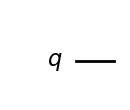

In [ ]:
qc = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit
qc.draw("mpl")          # matplotlib visualization

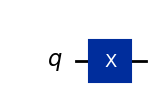

In [8]:
qc = QuantumCircuit(1)  # Prepare the single-qubit quantum circuit
qc.x(0) # Apply a X gate to qubit 0
qc.draw("mpl") # Draw the circuit   

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


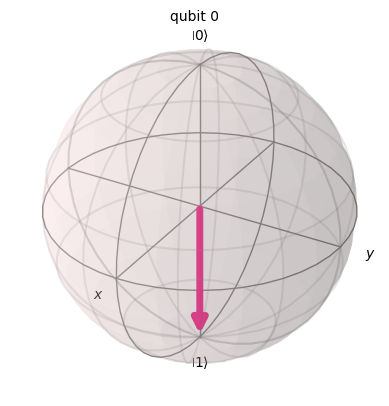

In [9]:
out_vector = Statevector(qc) # See the statevector
print(out_vector)
 
plot_bloch_multivector(out_vector) # Draw a Bloch sphere

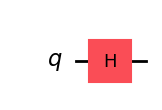

In [10]:
qc = QuantumCircuit(1)  # Create the single-qubit quantum circuit
 
# Apply an Hadamard gate to qubit 0
qc.h(0)
 
# Draw the circuit
qc.draw(output="mpl")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


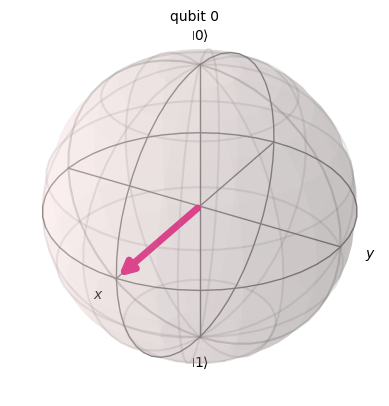

In [11]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)
 
# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

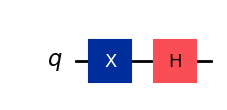

In [12]:
qc = QuantumCircuit(1)  # Create the single-qubit quantum circuit
 
# Apply a X gate to qubit 0
qc.x(0)
 
# Apply an Hadamard gate to qubit 0
qc.h(0)
 
# draw the circuit
qc.draw(output="mpl")

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


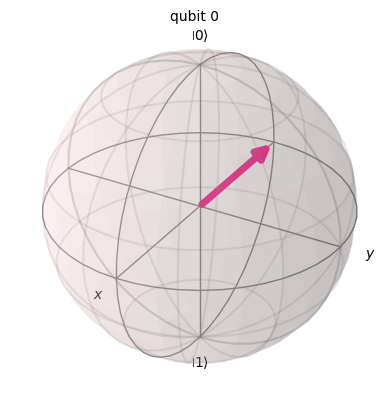

In [13]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)
 
# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

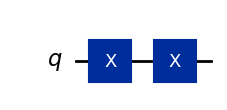

In [14]:
qc = QuantumCircuit(1) 
qc.x(0)
qc.x(0)
qc.draw("mpl")

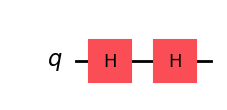

In [15]:
qc = QuantumCircuit(1) 
qc.h(0)
qc.h(0)
qc.draw("mpl")

## Z-gate, Pauli-Z, phase flip gate

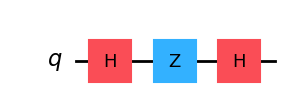

In [16]:
qc = QuantumCircuit(1) 
qc.h(0)
qc.z(0)
qc.h(0)
qc.draw("mpl")

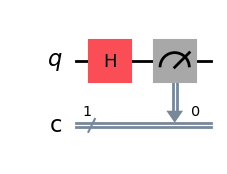

In [20]:
qc = QuantumCircuit(1, 1) # 1 qubit, 1 classical bit
qc.h(0)
qc.measure(0, 0)
qc.draw(output="mpl")

{'1': 523, '0': 501}


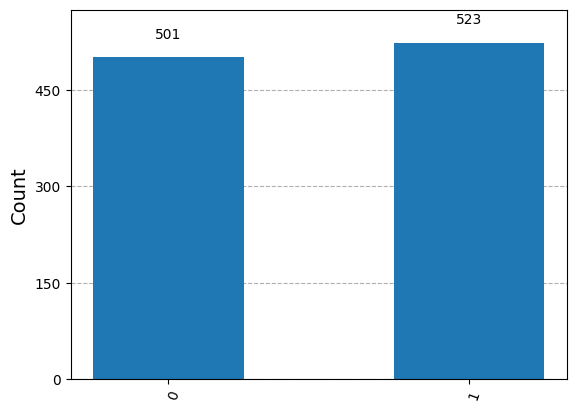

In [33]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc])
result = job.result()

counts = result[0].data.c.get_counts()
print(counts)

plot_histogram(counts)

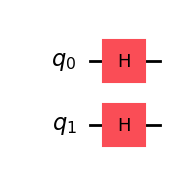

In [34]:
# Create the two qubits quantum circuit
qc = QuantumCircuit(2)
 
# Apply an H gate to qubit 0
qc.h(0)
 
# Apply an H gate to qubit 1
qc.h(1)
 
# Draw the circuit
qc.draw(output="mpl")

In [35]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


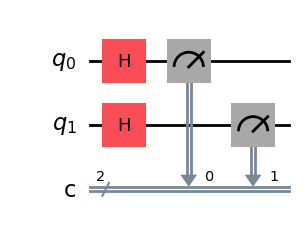

In [36]:
# Create a new circuit with two qubits (first argument) and two classical bits (second argument)
qc = QuantumCircuit(2, 2)
 
# Apply the gates
qc.h(0)
qc.h(1)
 
# Add the measurement gates
qc.measure(0, 0)  # Measure qubit 0 and save the result in bit 0
qc.measure(1, 1)  # Measure qubit 1 and save the result in bit 1
 
# Draw the circuit
qc.draw(output="mpl")

{'01': 285, '10': 242, '11': 247, '00': 250}


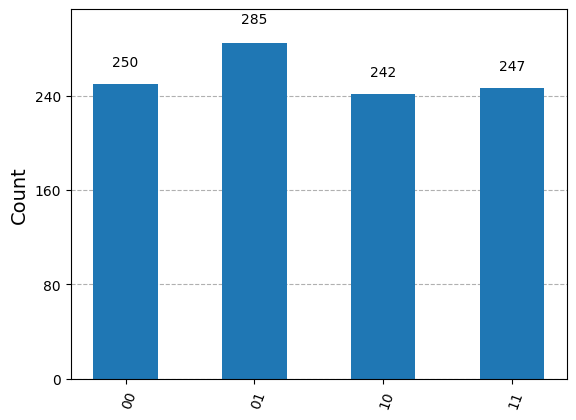

In [44]:
# Run the circuit on a simulator to get the results
# Define backend
backend = AerSimulator()
 
# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
 
# Run the job
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc])
result = job.result()
 
# Print the results
counts = result[0].data.c.get_counts()
print(counts)
 
# Plot the counts in a histogram
plot_histogram(counts)

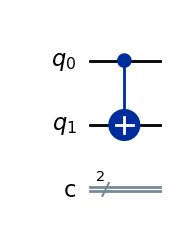

In [46]:
# Create a circuit with two quantum registers and two classical registers
qc = QuantumCircuit(2, 2)
 
# Apply the CNOT (cx) gate to a |00> state.
qc.cx(0, 1)  # Here the control is set to q0 and the target is set to q1.
 
# Draw the circuit
qc.draw(output="mpl")

In [47]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


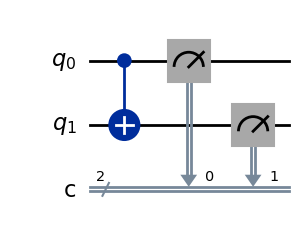

In [48]:
# Add measurements
qc.measure(0, 0)
qc.measure(1, 1)
 
# Draw the circuit
qc.draw(output="mpl")

{'00': 1024}


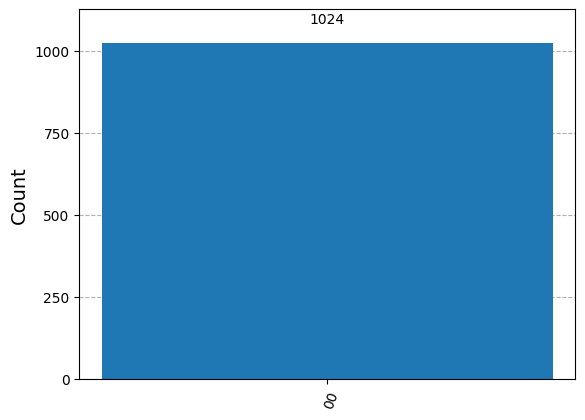

In [50]:
# Run the circuit on a simulator to get the results
# Define backend
backend = AerSimulator()
 
# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
 
# Run the job
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()
 
# Print the results
counts = result[0].data.c.get_counts()
print(counts)
 
# Plot the counts in a histogram
plot_histogram(counts)

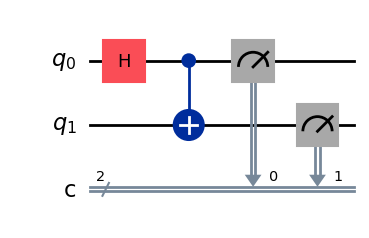

In [52]:
qc = QuantumCircuit(2, 2)
 
qc.h(0)
qc.cx(0, 1)
 
qc.measure(0, 0)
qc.measure(1, 1)
 
qc.draw("mpl")

In [54]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
token="p5-H5VQC2P760H35DOQKZcXPsimt0Rla0af7NXsfy0IL",
)


In [55]:
service = QiskitRuntimeService()
service.backends()

qiskit_runtime_service.__init__:WARNING:2025-11-13 10:39:46,480: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-13 10:39:46,481: Loading instance: open-instance, plan: open


[<IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('ibm_marrakesh')>]

In [56]:
backend = service.least_busy(operational=True)
print("The least busy device is ", backend)

qiskit_runtime_service.backends:WARNING:2025-11-13 10:39:56,970: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-11-13 10:39:57,490: Using instance: open-instance, plan: open


The least busy device is  <IBMBackend('ibm_fez')>


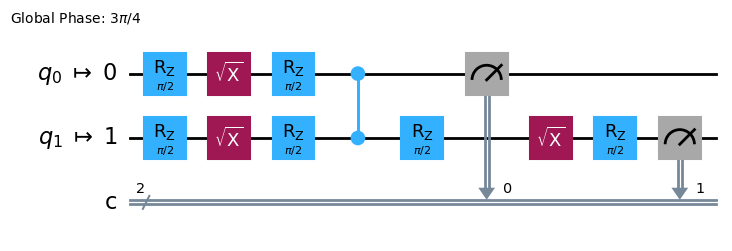

In [57]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
target_circuit = pm.run(qc)
 
target_circuit.draw("mpl", idle_wires=False)

In [58]:
sampler = Sampler(backend)
job_real = sampler.run([target_circuit])
 
job_id = job_real.job_id()
print("job id:", job_id)

job id: d4arbbnnmdfs73ad7t0g


In [60]:
# Check the job status (replace the job id below with your own)
job_real.status()

'DONE'

In [61]:
result_real = job_real.result()
print(result_real[0].data.c.get_counts())

{'00': 1973, '11': 1871, '10': 151, '01': 101}


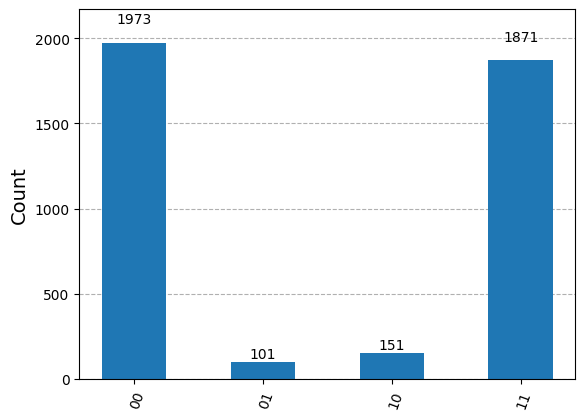

In [62]:
plot_histogram(result_real[0].data.c.get_counts())

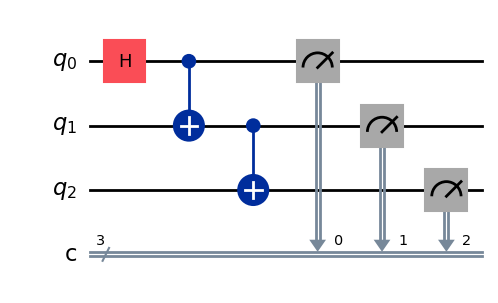

In [63]:
qc = QuantumCircuit(3, 3)
 
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
 
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
 
qc.draw("mpl")

In [64]:
qc.depth()

4

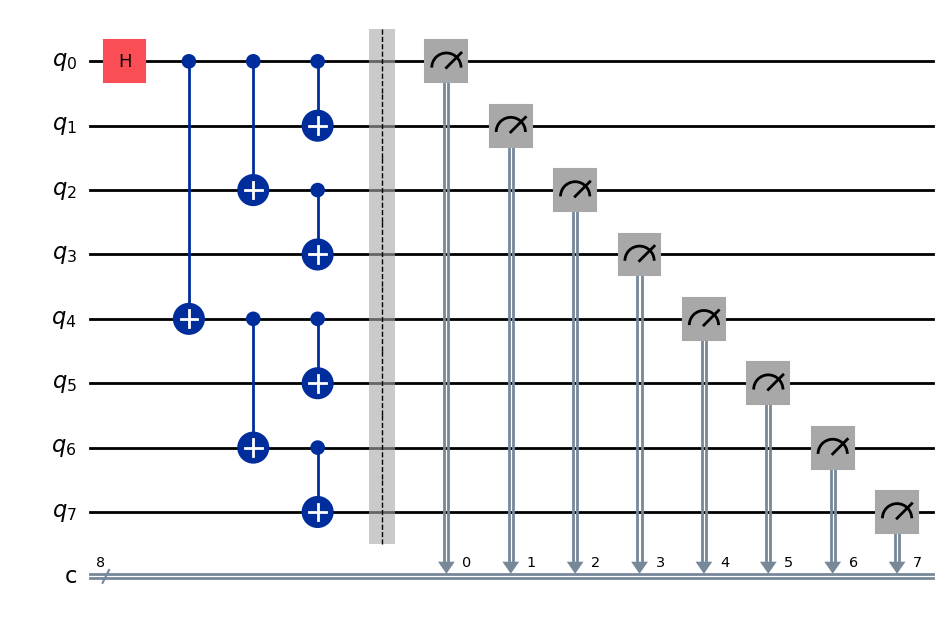

In [65]:
# Step 1
qc = QuantumCircuit(8, 8)
 
##your code goes here##
qc.h(0)
qc.cx(0, 4)
qc.cx(4, 6)
qc.cx(6, 7)
 
qc.cx(4, 5)
 
qc.cx(0, 2)
qc.cx(2, 3)
 
qc.cx(0, 1)
qc.barrier()  # for visual separation
 
# measure
for i in range(8):
    qc.measure(i, i)
 
qc.draw("mpl")
# print(qc.depth())

In [66]:
print(qc.depth())

5


{'00000000': 531, '11111111': 493}


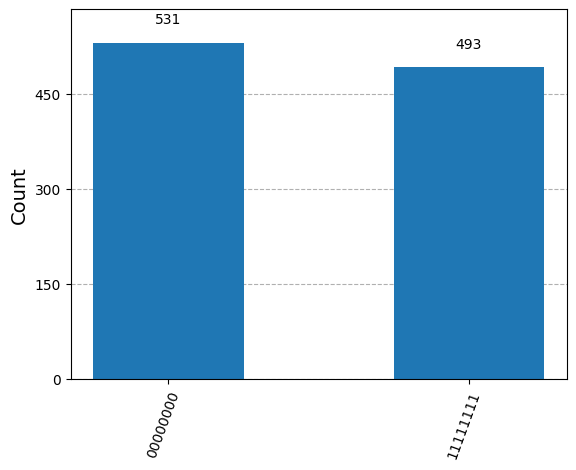

In [67]:
from qiskit.visualization import plot_histogram
# Step 2
# For this exercise, the circuit and operators are simple, so no optimizations are needed.
 
# Step 3
# Run the circuit on a simulator to get the results
backend = AerSimulator()
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
 
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=1024)
result = job.result()
 
counts = result[0].data.c.get_counts()
print(counts)
 
# Step 4
# Plot the counts in a histogram
 
plot_histogram(counts)